<a href="https://colab.research.google.com/github/dhyannn/Deep-learning/blob/main/514_DLprog3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Imagine you are the manager of an online retail store, and you want to optimize the pricing
strategy for a specific product based on real-time data with the objective to minimize the revenue
lost on the marketing/advertisements of a product. Assume the revenue function is given by
ƒ (w) = 0.5w2-30w +100, where x is the cost on the product advertisement. Start with an initial
price as w=20 and find the optimal price (w) using appropriate momentum based optimization
algorithm that could minimize the revenue lost. (Note: repeat for at least 3 iterations with
learning rate=0.1 & momentum=0.9)


In [1]:
import matplotlib.pyplot as plt

In [2]:
# Initialize variables
w = 20
learning_rate = 0.1
momentum = 0.9
iterations = 3
velocity = 0
prices = []
revenues = []

In [3]:
# Define the revenue function
def revenue(w):
    return 0.5 * w**2 - 30 * w + 100

In [4]:
# Optimization loop
for i in range(iterations):
    # Compute gradient
    gradient = w - 30

    # Update velocity with momentum
    velocity = momentum * velocity + learning_rate * gradient

    # Update price
    w -= velocity

    # Append current price and revenue
    prices.append(w)
    revenues.append(revenue(w))

    # Print current price and revenue
    print(f"Iteration {i+1}: Price = {w:.2f}, Revenue = {revenue(w):.2f}")

Iteration 1: Price = 21.00, Revenue = -309.50
Iteration 2: Price = 22.80, Revenue = -324.08
Iteration 3: Price = 25.14, Revenue = -338.19


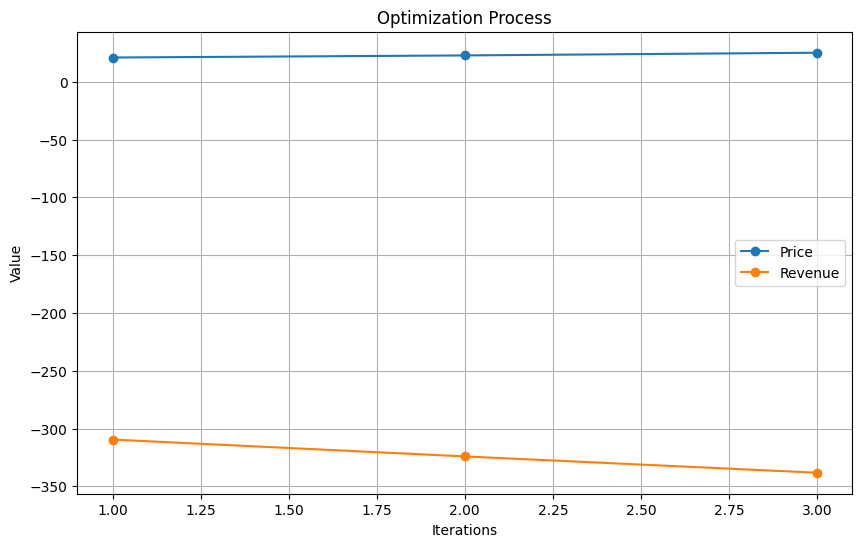

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations+1), prices, marker='o', label='Price')
plt.plot(range(1, iterations+1), revenues, marker='o', label='Revenue')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Optimization Process')
plt.legend()
plt.grid(True)
plt.show()


2.You are working as a data scientist for a healthcare company that aims to predict the likelihood
of patients developing a certain disease based on various medical parameters. You have been
tasked with developing a deep learning model using a dataset obtained from Kaggle or any other
repository. This dataset contains information about patients' demographics, medical history, and
test results.
Your goal is to build a neural network model that can effectively predict the likelihood of a
patient developing the disease. However, due to the complexity of the dataset and potential
overfitting issues, you decide to implement three different regularization techniques: L1
regularization, L2 regularization, and elastic net regularization.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import train_test_split

In [7]:
Data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
Data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
Data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
X = Data.drop('diabetes',axis=1)
y = Data['diabetes']


In [12]:
categoricalFeatures = ['gender', 'smoking_history']
numericalFeatures = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
         ('num', StandardScaler(), numericalFeatures),
         ('cat', OneHotEncoder(), categoricalFeatures)
    ]
)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [15]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [16]:

X_train_encoded = np.array(X_train_encoded)
X_test_encoded = np.array(X_test_encoded)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [17]:
print(np.isnan(X_train_encoded).any(), np.isinf(X_train_encoded).any())
print(np.isnan(y_train).any(), np.isinf(y_train).any())

False False
False False


In [18]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_encoded.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # L1
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # L2
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))  # Elastic Net
model.add(Dense(1, activation='sigmoid'))


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train_encoded, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2000/2000 [==============================] - 6s 2ms/step - loss: 0.4104 - accuracy: 0.9508 - val_loss: 0.2015 - val_accuracy: 0.9595
Epoch 2/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1915 - accuracy: 0.9595 - val_loss: 0.1836 - val_accuracy: 0.9590
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1798 - accuracy: 0.9598 - val_loss: 0.1753 - val_accuracy: 0.9614
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1724 - accuracy: 0.9596 - val_loss: 0.1675 - val_accuracy: 0.9612
Epoch 5/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1679 - accuracy: 0.9599 - val_loss: 0.1651 - val_accuracy: 0.9604
Epoch 6/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1657 - accuracy: 0.9604 - val_loss: 0.1635 - val_accuracy: 0.9614
Epoch 7/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1640 - accuracy: 0.9597 - val_loss: 0.1666 - val_accuracy:

In [21]:
y_pred = model.predict(X_test_encoded)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

625/625 [==============================] - 1s 1ms/step


In [22]:
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Accuracy: 0.9584, Precision: 0.8918, Recall: 0.5837, F1-Score: 0.7056


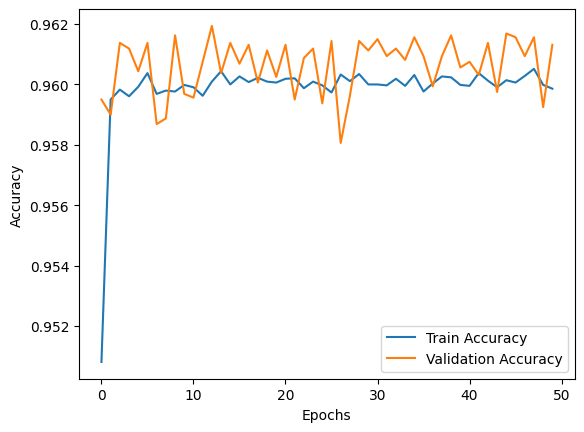

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
confMatrix = confusion_matrix(y_test,y_pred_binary)
print("Confusion Matrix :\n ",confMatrix)

Confusion Matrix :
  [[18171   121]
 [  711   997]]


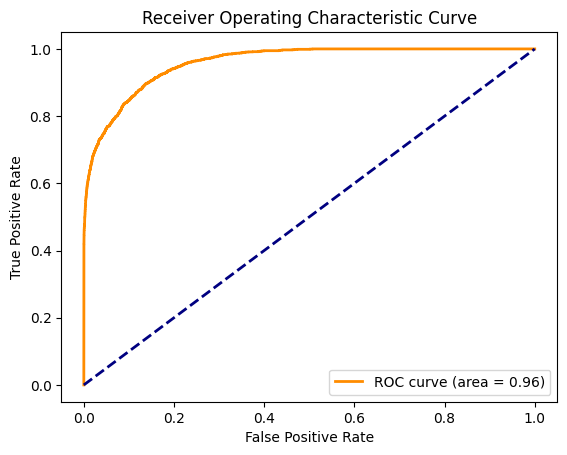

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()